<a href="https://colab.research.google.com/github/nepalprabin/tensorflow/blob/master/feedforward_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

#import commonly used modules
import numpy as np
import os
import sys

**Boston Housing Price Prediction with Feed Forward Networks**

In [0]:
#loading the dataset
(train_features,train_labels), (test_features,test_labels)=keras.datasets.boston_housing.load_data()

#normalizing the training set
train_mean=np.mean(train_features,axis=0)
train_std=np.std(train_features,axis=0)
train_features=(train_features-train_mean)/train_std

Building the model involves configuring the layers of the model and compiling the model. First we stack layers using keras.Sequential. Then, we compile our model using optimizer, loss and metrics.

In [0]:
#building the model
from tensorflow.keras.layers import Dense
def build_model():
  model = keras.Sequential([
        Dense(20, activation=tf.nn.relu, input_shape=[len(train_features[0])]),
        Dense(1)
    ])
  model.compile(optimizer=tf.train.AdamOptimizer(),
               loss='mse',
               metrics=['mae','mse'])
  return model

In [25]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# show RMSE measure to compare to Kaggle leaderboard on https://www.kaggle.com/c/boston-housing/leaderboard
rmse_final = np.sqrt(float(hist['val_mean_squared_error'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
............................
Final Root Mean Square Error on validation set: 2.282


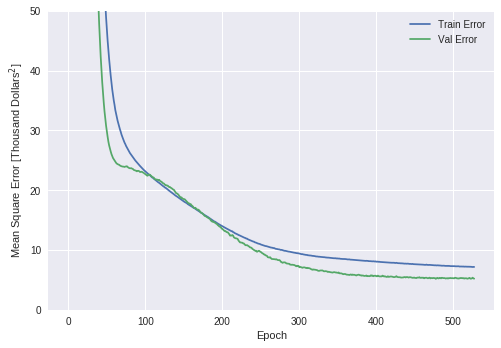

In [26]:

def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'], label = 'Val Error')
    plt.legend()
    plt.ylim([0,50])

plot_history()

In [27]:
test_features_norm = (test_features - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm, test_labels)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

102/102 [==============================] - 0s 109us/sample - loss: 16.0493 - mean_absolute_error: 2.6734 - mean_squared_error: 16.0493
Root Mean Square Error on test set: 4.006
